## Package Import 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler,StandardScaler, LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer,make_column_selector
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from catboost import CatBoostRegressor
import xgboost as xgb



## Data Import

In [2]:
data = pd.read_csv('fipe_2022.csv')
data.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl,age_years
0,2022,January,038001-6,vwmrywl5qs,Acura,NSX 3.0,Gasoline,manual,3.0,1995,43779.0,28
1,2022,January,038001-6,t9mt723qhz,Acura,NSX 3.0,Gasoline,manual,3.0,1994,42244.0,29
2,2022,January,038001-6,tr5wv4z21g,Acura,NSX 3.0,Gasoline,manual,3.0,1993,40841.0,30
3,2022,January,038001-6,s2xxsjz3mt,Acura,NSX 3.0,Gasoline,manual,3.0,1992,39028.0,31
4,2022,January,038001-6,rtm9gj7zk8,Acura,NSX 3.0,Gasoline,manual,3.0,1991,35678.0,32


## Null HeatMap

<AxesSubplot:>

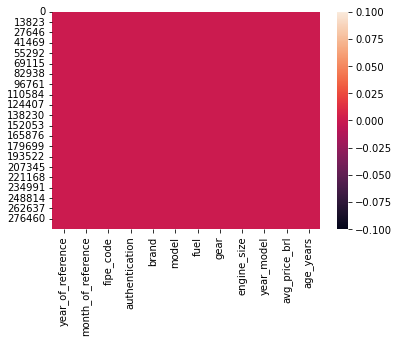

In [3]:
sns.heatmap(data.isna())

## EDA

In [4]:
data.isna().sum()

year_of_reference     0
month_of_reference    0
fipe_code             0
authentication        0
brand                 0
model                 0
fuel                  0
gear                  0
engine_size           0
year_model            0
avg_price_brl         0
age_years             0
dtype: int64

In [5]:
data.describe()

,year_of_reference,engine_size,year_model,avg_price_brl,age_years
count,290275.0,290275.000000,290275.000000,2.902750e+05,290275.000000
mean,2022.0,2.266047,2008.896633,1.220872e+05,14.103367
std,0.0,1.033109,9.263619,3.219139e+05,9.263619
min,2022.0,0.700000,1985.000000,1.831000e+03,0.000000
25%,2022.0,1.600000,2001.000000,2.187500e+04,7.000000
50%,2022.0,2.000000,2010.000000,4.683600e+04,13.000000
75%,2022.0,2.800000,2016.000000,1.061650e+05,22.000000
max,2022.0,6.700000,2023.000000,8.600000e+06,38.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290275 entries, 0 to 290274
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   year_of_reference   290275 non-null  int64  
 1   month_of_reference  290275 non-null  object 
 2   fipe_code           290275 non-null  object 
 3   authentication      290275 non-null  object 
 4   brand               290275 non-null  object 
 5   model               290275 non-null  object 
 6   fuel                290275 non-null  object 
 7   gear                290275 non-null  object 
 8   engine_size         290275 non-null  float64
 9   year_model          290275 non-null  int64  
 10  avg_price_brl       290275 non-null  float64
 11  age_years           290275 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 26.6+ MB


With the increase in engine size, cars with automatic gear will have a higher average price.

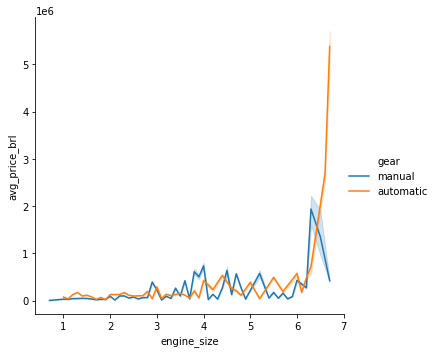

In [7]:
sns.relplot(
    data=data, kind="line", hue="gear",
    x="engine_size", y="avg_price_brl",sizes=(8, 16),ci=100, n_boot=150)

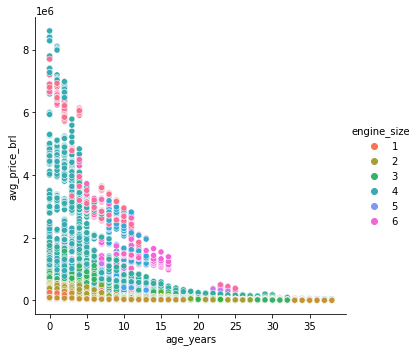

In [8]:

sns.relplot(
    data=data, kind="scatter", hue="engine_size",palette="husl",
    x="age_years", y="avg_price_brl", facet_kws=dict(sharex=False),sizes=(5, 10))

Cars with models higher than 2010 have more numbers

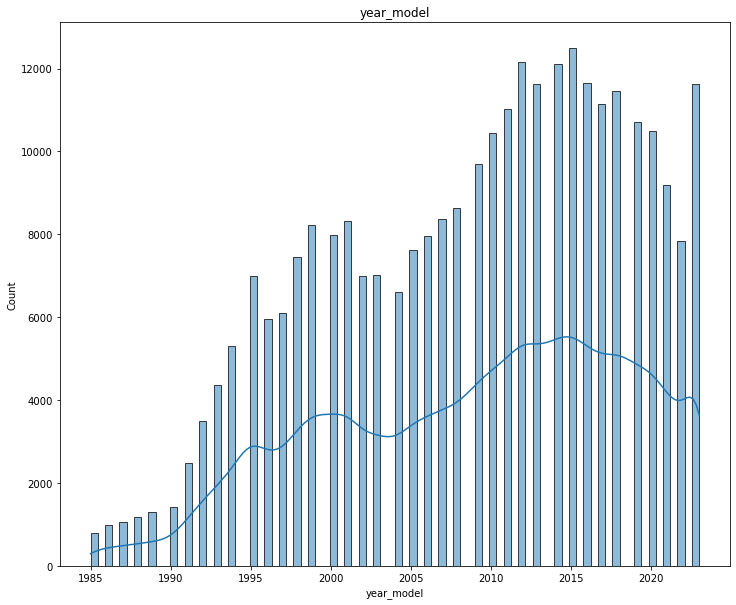

In [9]:
plt.figure(figsize= (12, 10))
ax = sns.histplot(data= data, x= 'year_model',kde= True)
ax.set_title('year_model')
plt.show()

According to the diagram below, cars with manual gears are mostly petrol-burners with a shorter lifespan and a higher average price. They also have gears between 3 and 5

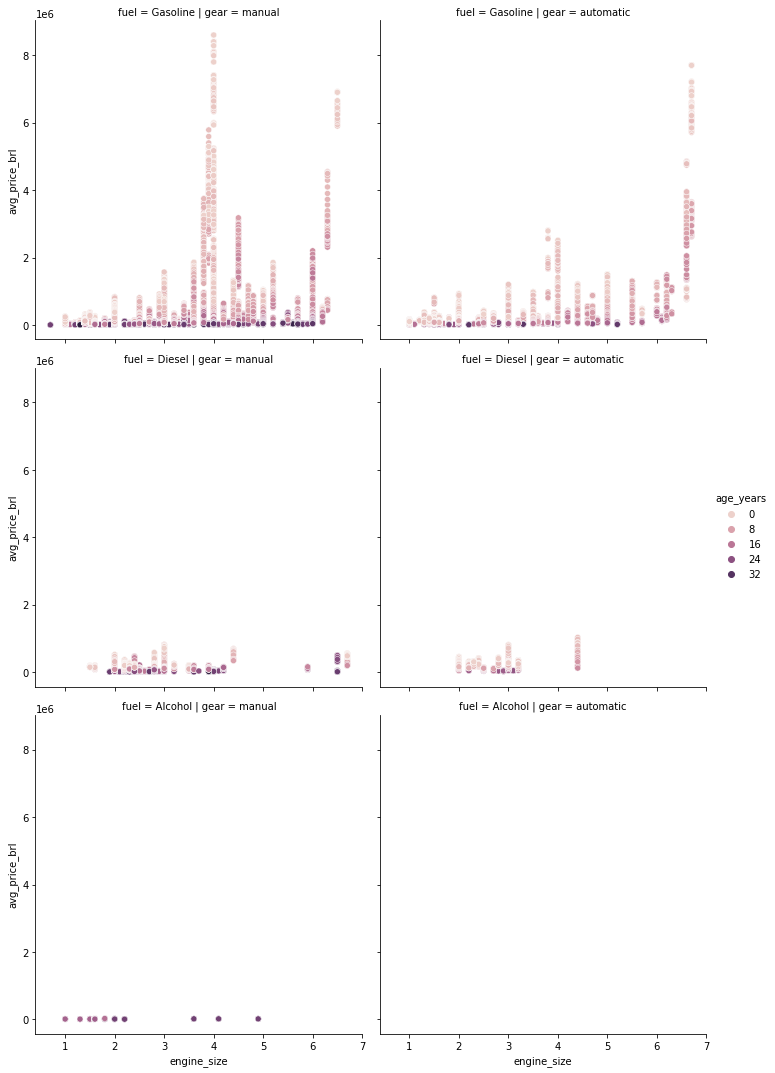

In [10]:
sns.relplot(data=data, x="engine_size", y="avg_price_brl", hue="age_years", col="gear", row="fuel")

According to the diagram below, cars with manual gears are mostly petrol-burning.

<AxesSubplot:xlabel='gear', ylabel='fuel'>

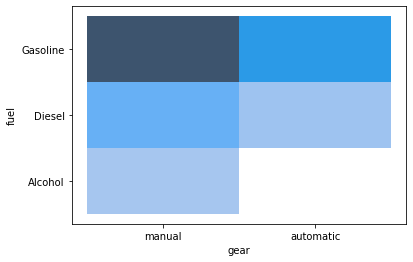

In [11]:
sns.histplot(data=data,x='gear', y="fuel")

The Count of cars with manual gear is about 2.5 for cars with automatic gear

Text(0.5, 1.0, 'gear Distribution')

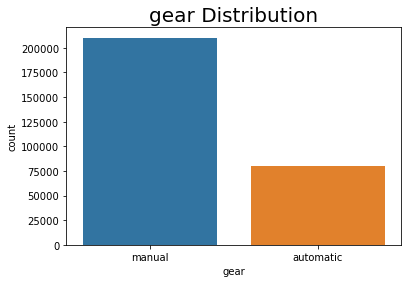

In [12]:
plot = sns.countplot(x ='gear', data = data)
plot.axes.set_title("gear Distribution",fontsize=20)

Most of the existing cars are gasoline-burning

Text(0.5, 1.0, 'gear Distribution')

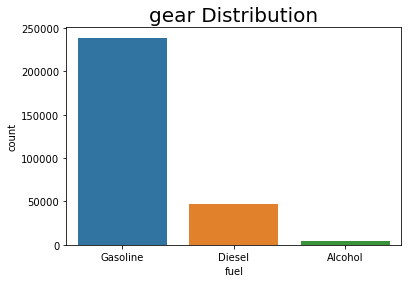

In [13]:
plot = sns.countplot(x ='fuel', data = data)
plot.axes.set_title("gear Distribution",fontsize=20)

In [14]:
filter_column=['fuel','gear','engine_size','year_model','avg_price_brl']
df =data[filter_column]


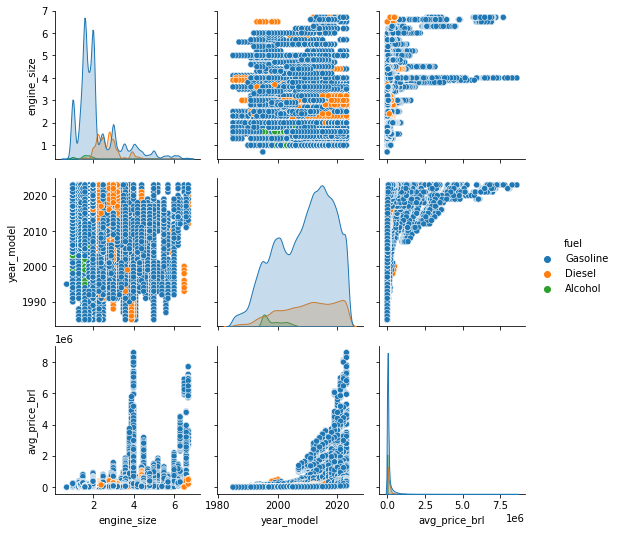

In [15]:
sns.pairplot(data=df, hue="fuel")

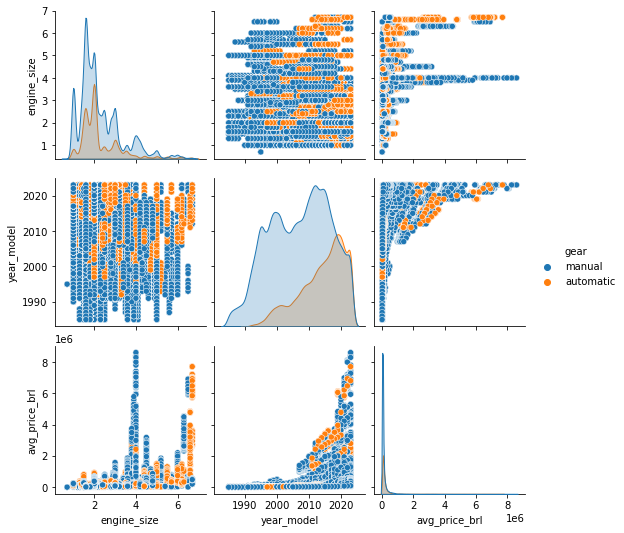

In [16]:
sns.pairplot(data=df, hue="gear")

Alcohol-burning cars were made only in the years 1995 to 2006

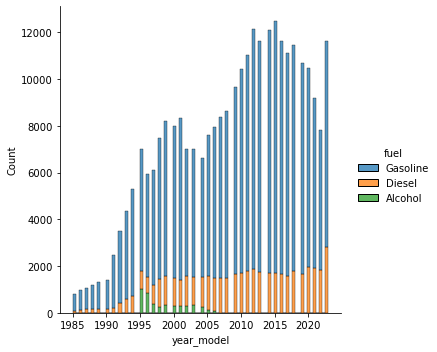

In [17]:
sns.displot(data, x="year_model", hue="fuel", multiple="stack",)

## Filtering Data

In [3]:
filter_column=['brand','model','fuel','gear','engine_size','age_years','avg_price_brl']
data=data[filter_column]

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290275 entries, 0 to 290274
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   brand          290275 non-null  object 
 1   model          290275 non-null  object 
 2   fuel           290275 non-null  object 
 3   gear           290275 non-null  object 
 4   engine_size    290275 non-null  float64
 5   age_years      290275 non-null  int64  
 6   avg_price_brl  290275 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 15.5+ MB


In [20]:
data.describe()

,engine_size,age_years,avg_price_brl
count,290275.000000,290275.000000,2.902750e+05
mean,2.266047,14.103367,1.220872e+05
std,1.033109,9.263619,3.219139e+05
min,0.700000,0.000000,1.831000e+03
25%,1.600000,7.000000,2.187500e+04
50%,2.000000,13.000000,4.683600e+04
75%,2.800000,22.000000,1.061650e+05
max,6.700000,38.000000,8.600000e+06


## Train Test Split and Preprocessing of data

In [4]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [5]:

oh=OneHotEncoder(drop='first',handle_unknown='ignore')
s1=StandardScaler()
m1=MinMaxScaler()

ct=ColumnTransformer(
                    [
                        ('cat_encoder',oh,make_column_selector(dtype_include='object')),
                        ('Numerical Scaler',m1,make_column_selector(dtype_exclude='object')),  
                    ]
                    ,remainder='passthrough')

In [6]:
X=ct.fit_transform(X)

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

## Model fitting

In [8]:
lr = LinearRegression(n_jobs=-1)
svr = SVR(max_iter=3000)
dtr = DecisionTreeRegressor()
knnr = KNeighborsRegressor(n_neighbors=31,n_jobs=-1)
rfr = RandomForestRegressor(n_jobs=-1)
abr = AdaBoostRegressor(n_estimators=100,learning_rate=0.2)
sr =SGDRegressor()
# cbr = CatBoostRegressor(iterations=2000, learning_rate=0.7,depth=15,eval_metric='MAE', verbose=50,task_type='GPU')
xg_reg  =xgb.XGBRFRegressor(colsample_bynode=.5,max_depth=23,
                            n_estimators=400,n_jobs=-1,random_state=23)

reg_list=[lr,svr,dtr,knnr,rfr,abr,sr,xg_reg]

In [9]:
%%time
counter=1
for reg in reg_list:
    reg.fit(X_train,y_train.values.ravel())
    print(f"Fitting {counter} done")
    counter+=1

Fitting 1 done


/home/ali/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Fitting 2 done
Fitting 3 done
Fitting 4 done
Fitting 5 done
Fitting 6 done
Fitting 7 done
Fitting 8 done
CPU times: user 1h 23min 38s, sys: 1min 20s, total: 1h 24min 58s
Wall time: 14min 15s


## Model Testing

In [10]:
%%time
score_dict={}

for reg in reg_list:
    
    reg_name = reg.__class__.__name__
    
    pred=reg.predict(X_test)
    
    print("-"*50)
    
    print(reg_name)
    
    print(f"R2 Score : {r2_score(y_test,pred)}")
    print(f"Mean Absolute Error Score : {mean_absolute_error(y_test,pred)}")
    
    
    
    score_dict[reg_name]={
        "R2 Score":r2_score(y_test,pred),
        "Mean Absolute Error Score":mean_absolute_error(y_test,pred),

    }

--------------------------------------------------
LinearRegression
R2 Score : 0.9765538473084666
Mean Absolute Error Score : 17582.729729364568
Mean Sqaured Error Score : 2362116953.4126124
--------------------------------------------------
SVR
R2 Score : -2.607514902389414
Mean Absolute Error Score : 554713.0854728585
Mean Sqaured Error Score : 363444366448.22394
--------------------------------------------------
DecisionTreeRegressor
R2 Score : 0.9977121962708019
Mean Absolute Error Score : 3308.111460189837
Mean Sqaured Error Score : 230488133.63614196
--------------------------------------------------
KNeighborsRegressor
R2 Score : 0.9803953727953124
Mean Absolute Error Score : 10793.357417345629
Mean Sqaured Error Score : 1975096848.2879953
--------------------------------------------------
RandomForestRegressor
R2 Score : 0.9977150088452181
Mean Absolute Error Score : 3340.714908107117
Mean Sqaured Error Score : 230204776.7119199
-------------------------------------------------

## Results in DataFrame

In [11]:
score_pd=pd.DataFrame(score_dict).transpose().sort_values("R2 Score",ascending=False)
score_pd


,R2 Score,Mean Absolute Error Score,Mean Squared Error Score
RandomForestRegressor,0.997715,3340.714908,2.302048e+08
DecisionTreeRegressor,0.997712,3308.111460,2.304881e+08
XGBRFRegressor,0.995293,8853.547969,4.741831e+08
KNeighborsRegressor,0.980395,10793.357417,1.975097e+09
LinearRegression,0.976554,17582.729729,2.362117e+09
SGDRegressor,0.913673,35456.303628,8.697099e+09
AdaBoostRegressor,0.727820,77138.859937,2.742116e+10
SVR,-2.607515,554713.085473,3.634444e+11
